In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import tree
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from feature_engine.selection import(
    DropDuplicateFeatures,
    DropConstantFeatures,
    SmartCorrelatedSelection,
)

In [2]:
# Load training and test set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Training set dimensions
print("Train dataset:", len(train), "rows and", len(train.columns), "columns")

# First 5 rows of training set 
display(train.head(5))

Train dataset: 76020 rows and 371 columns


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
# Descriptive statistics of the training set
display(train.describe())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [4]:
# Test set dimensions
print("Test dataset:", len(test), "rows and", len(test.columns), "columns")

Test dataset: 75818 rows and 370 columns


In [5]:
# The TARGET is extremly imbalanced in the dataset
train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Target distribution')

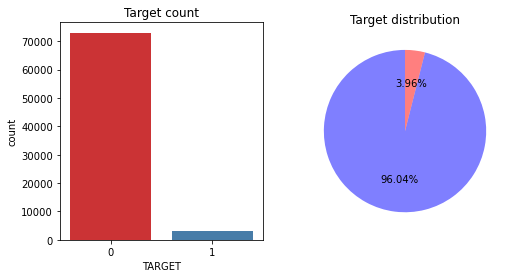

In [6]:
# Visualization of the count and distrbution of the TARGET variable confirms the dataset is imbalanced.
lentrain = len(train)
target_0 = len(train.loc[train['TARGET']==0])/lentrain
target_1 = 1-target_0

fig, axes = plt.subplots(1, 2, figsize=(8,4))

# TARGET bar chart
sns.countplot(x='TARGET', ax=axes[0], data=train, palette='Set1')
axes[0].set_title('Target count')

# TARGET pie chart
axes[1].pie([target_0, target_1], colors=['blue', 'red'], autopct='%1.2f%%', shadow=False, startangle=90, wedgeprops={'alpha':.5})
axes[1].set_title('Target distribution')

In [7]:
# Checking for NaN values or missing data in the training set
print("Number of missing data is ", train.isna().any().sum())

Number of missing data is  0


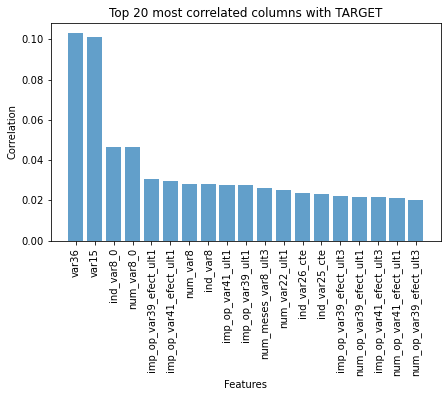

In [8]:
# Correlation matrix of top 20 correlated features
corr = train.corr()
top20_corr = corr.nlargest(20, 'TARGET')['TARGET']

# Plot top20 correlations
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(7,4))
plt.bar(top20_corr[1:].index.values, top20_corr[1:].values, alpha=0.7)
plt.title("Top 20 most correlated columns with TARGET")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()

In [9]:
# Splitting the dataset into subsets for training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(labels=['ID','TARGET'], axis=1),
    train['TARGET'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((60816, 369), (15204, 369))

In [10]:
%%time
# Using Pipeline and feature_engine libraries to select the optimum features. This pipeline removes
# constant features, duplicate features and correlated features while making use of a random forest classifier.
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()), 
    ('correlation', SmartCorrelatedSelection(
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

pipe.fit(X_train, y_train)

CPU times: user 27.9 s, sys: 430 ms, total: 28.4 s
Wall time: 32.8 s


Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                                           random_state=1),
                                          selection_method='model_performance'))])

In [11]:
# Display the number of features dropped
print('Number of original features: ', X_train.shape[1])

X_train = pipe.transform(X_train)

print('Number of features after selection: ', X_train.shape[1])

print("Number of constant features dropped:", len(pipe.named_steps['constant'].features_to_drop_))
print("Number of duplicate features dropped:", len(pipe.named_steps['duplicated'].features_to_drop_))
print("Number of correlated features dropped:", len(pipe.named_steps['correlation'].features_to_drop_))

Number of original features:  369
Number of features after selection:  81
Number of constant features dropped: 177
Number of duplicate features dropped: 8
Number of correlated features dropped: 103


In [12]:
print('Number of original variables: ', X_test.shape[1])

X_test = pipe.transform(X_test)

print('Number of variables after selection: ', X_test.shape[1])

Number of original variables:  369
Number of variables after selection:  81


In [13]:
%%time
# Building and training the decision tree model - 1 (best results)
clf_1=DecisionTreeClassifier(max_depth=10, max_leaf_nodes=24,splitter='best',
                           class_weight='balanced',min_samples_leaf=10, criterion='entropy')

#Apply Classifier on Train and Target
clf_1.fit(X_train,y_train)

CPU times: user 284 ms, sys: 14.5 ms, total: 298 ms
Wall time: 299 ms


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_leaf_nodes=24, min_samples_leaf=10)

In [14]:
%%time
# Building and training the decision tree model - 2
clf_2=DecisionTreeClassifier(max_depth=4, max_leaf_nodes=40,splitter='best',
                           class_weight='balanced',min_samples_leaf=10, criterion='entropy')

#Apply Classifier on Train and Target
clf_2.fit(X_train,y_train)

CPU times: user 189 ms, sys: 2.29 ms, total: 192 ms
Wall time: 194 ms


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_leaf_nodes=40, min_samples_leaf=10)

In [15]:
%%time
# Building and training the decision tree model - 3
clf_3=DecisionTreeClassifier(max_depth=100, max_leaf_nodes=24,splitter='random',
                           class_weight='balanced',min_samples_leaf=10, criterion='gini')

#Apply Classifier on Train and Target
clf_3.fit(X_train,y_train)

CPU times: user 77.3 ms, sys: 1.86 ms, total: 79.1 ms
Wall time: 78 ms


DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       max_leaf_nodes=24, min_samples_leaf=10,
                       splitter='random')

In [16]:
%%time
# Obtaining predictions and determining the model 1 accuracy
X_Pred_test_1 = clf_1.predict(X_test)
print("TEST Accuracy:", accuracy_score(y_test,X_Pred_test_1))

TEST Accuracy: 0.7559194948697711
CPU times: user 4.73 ms, sys: 995 µs, total: 5.73 ms
Wall time: 4.48 ms


In [17]:
%%time
# Obtaining predictions and determining the model 2 accuracy
X_Pred_test_2 = clf_2.predict(X_test)
print("TEST Accuracy:", accuracy_score(y_test,X_Pred_test_2))

TEST Accuracy: 0.7159957905814259
CPU times: user 4.34 ms, sys: 773 µs, total: 5.11 ms
Wall time: 4.03 ms


In [18]:
%%time
# Obtaining predictions and determining the model 3 accuracy
X_Pred_test_3 = clf_3.predict(X_test)
print("TEST Accuracy:", accuracy_score(y_test,X_Pred_test_3))

TEST Accuracy: 0.751446987634833
CPU times: user 4.22 ms, sys: 771 µs, total: 4.99 ms
Wall time: 3.8 ms


In [19]:
# Since this is a complex classification problem, a better performance metric would be
# a confusion matrix
#Model 1 confusion matrix
print(classification_report(y_test,X_Pred_test_1))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     14570
           1       0.12      0.76      0.21       634

    accuracy                           0.76     15204
   macro avg       0.55      0.76      0.53     15204
weighted avg       0.95      0.76      0.83     15204



In [20]:
#Model 3 confusion matrix
print(classification_report(y_test,X_Pred_test_2))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     14570
           1       0.11      0.79      0.19       634

    accuracy                           0.72     15204
   macro avg       0.55      0.75      0.51     15204
weighted avg       0.95      0.72      0.80     15204



In [21]:
#Model 3 confusion matrix
print(classification_report(y_test,X_Pred_test_3))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     14570
           1       0.11      0.70      0.19       634

    accuracy                           0.75     15204
   macro avg       0.55      0.72      0.52     15204
weighted avg       0.95      0.75      0.83     15204



In [22]:
# Determining the AUC of the model
print('Test1 roc_auc: ', roc_auc_score(y_test,X_Pred_test_1))
print('Test2 roc_auc: ', roc_auc_score(y_test,X_Pred_test_2))
print('Test3 roc_auc: ', roc_auc_score(y_test,X_Pred_test_3))

Test1 roc_auc:  0.7595003128592739
Test2 roc_auc:  0.7492304094884047
Test3 roc_auc:  0.7247307136872144


In [23]:
# Preparing the test dataset for submission
train_df = train.copy()
test_df = test.copy()
train_id = train_df['ID']
test_id = test['ID']
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)
test_df = test_df[X_train.columns]
submission_pred = clf_1.predict(test_df)
submission_df = pd.DataFrame(submission_pred, columns=["TARGET"])
submission_col=test_id
submission = pd.concat([submission_col, submission_df], axis=1)
submission.head()
submission.to_csv("submission_1.csv", index=False)

In [24]:
test_df_1 = test_df[X_train.columns]
probs = clf_1.predict_proba(test_df_1)

submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("submission_2.csv", index=False)